## Ziv Kelmer-  $314096637$
## Noa Nesher- $318879533$

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sklearn.tree as tree
from sklearn.metrics import mean_squared_error as mse


### - reading the file, droping NaN rows and useing the function 'Copy' to take a copy of the data  

In [2]:
url = 'https://raw.githubusercontent.com/ShaiYona/Data-Science2021B/main/Assignments/4/nba.csv'
Data = pd.read_csv(url)
Dcopy = Data.copy().dropna()
Dcopy.tail()


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
449,Rodney Hood,Utah Jazz,5.0,SG,23.0,6-8,206.0,Duke,1348440.0
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,6-6,206.0,Dayton,981348.0
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


### - we split the data in to two groups (features,label)

In [3]:
features = ['Age', 'Height', 'Weight']
label = ['Salary']
Dcopy = Dcopy[features + label]
Dcopy.head(3)

,Age,Height,Weight,Salary
0,25.0,6-2,180.0,7730337.0
1,25.0,6-6,235.0,6796117.0
3,22.0,6-5,185.0,1148640.0


### - Convert the column into categories to be able working with the data


In [4]:
Dcopy['Height'] = Dcopy['Height'].astype('category').cat.codes
Dcopy.head(3)

,Age,Height,Weight,Salary
0,25.0,6,180.0,7730337.0
1,25.0,10,235.0,6796117.0
3,22.0,9,185.0,1148640.0


### - useing 'matplotlib' to show the two 'plots'
## - we think that 'pieplot' helps understanding the the data better

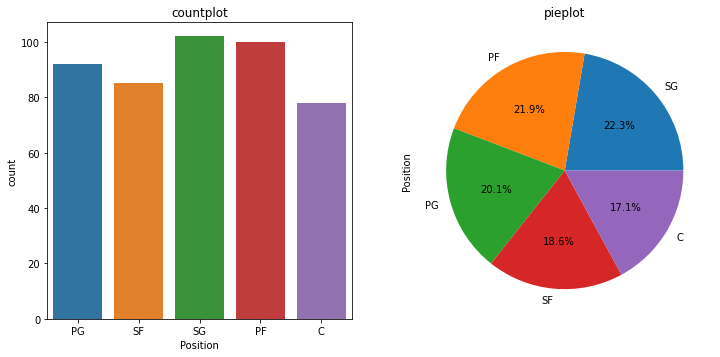

In [5]:
fig,axis = plt.subplots(figsize = (12,12))
plt.subplot(2,2,1)
plt.title("countplot")
sns.countplot(data=Data,x='Position')
plt.subplot(2,2,2)
plt.title("pieplot")
Data['Position'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()



### -useing 'train_test_split' for building our model

In [6]:
X = Dcopy[features]
y = Dcopy[label]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=43)  
X_train.head()

,Age,Height,Weight
14,26.0,14,253.0
152,31.0,2,161.0
120,31.0,11,210.0
386,29.0,12,225.0
47,25.0,2,201.0


In [7]:
y_test.head()

,Salary
175,111196.0
428,8042895.0
437,2525160.0
361,1294440.0
281,7070730.0


### - seting up the kind of model - We chosed the regression model becuse our label is 'Salary' and most likely it will be impossible to predict exactly the same amount   

In [8]:
model = DecisionTreeRegressor(random_state=5)
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=5)

### - We create new DataFrame for the 'predictions vs Salary' and showing the 'MSE' between predictions and the label

In [9]:
prediction = model.predict(X_test)
pred = pd.DataFrame(columns = ['Salary', 'predictions'])
pred['Salary'] = Dcopy['Salary']
pred = pred.reset_index(drop=True)
pred['predictions'] = pd.Series(prediction)
def mse(a,b):
    return np.sqrt(np.square(a-b).mean())
print("MSE: {:.3f}".format(mse(y_test.values,prediction)))
pred.head()


MSE: 7343185.444


,Salary,predictions
0,7730337.0,111444.0
1,6796117.0,1000000.0
2,1148640.0,2144772.0
3,1170960.0,525093.0
4,2165160.0,1463040.0


### - adding another column and checking if it affects the 'predictions'
### - first we convert the column into categories to be able working with the data
### - adding the new column to our features


In [10]:
Dcopy['Position'] = Data['Position'].astype('category').cat.codes.dropna()
featu = ['Age','Height','Weight','Position']
Dcopy.head()

,Age,Height,Weight,Salary,Position
0,25.0,6,180.0,7730337.0,2
1,25.0,10,235.0,6796117.0,3
3,22.0,9,185.0,1148640.0,4
6,21.0,12,235.0,1170960.0,1
7,25.0,14,238.0,2165160.0,0


### - seting the model with the new column
### - we can see the 'MSE' is better then it was with out the new column

In [11]:
k = Dcopy[featu]
z = Dcopy[label]
k_train,k_test,z_train,z_test = train_test_split(k,z,test_size=0.3,random_state=43)  
train_model = DecisionTreeRegressor(random_state=5)
train_model.fit(k_train, z_train)
prediction = train_model.predict(k_test)
predPo = pd.DataFrame(columns = ['Salary', 'predictions'])
predPo['Salary'] = Dcopy['Salary']
predPo = predPo.reset_index(drop=True)
predPo['predictions'] = pd.Series(prediction)
print("MSE: {:.3f}".format(mse(z_test.values,prediction)))
predPo.head()


MSE: 7234489.378


,Salary,predictions
0,7730337.0,1159680.0
1,6796117.0,1000000.0
2,1148640.0,947276.0
3,1170960.0,1007026.0
4,2165160.0,1463040.0


### - seting the model and now we define 'max_depth' and we can see the 'MSE' is much  better
## - we can lern that 'tree depth' improves our results drastically

In [12]:
model_maxD = DecisionTreeRegressor(max_depth = 3,random_state=5)
model_maxD.fit(k_train, z_train)
prediction = model_maxD.predict(k_test)
predPo1 = pd.DataFrame(columns = ['Salary', 'predictions'])
predPo1['Salary'] = Dcopy['Salary']
predPo1 = predPo1.reset_index(drop=True)
predPo1['predictions'] = pd.Series(prediction)
print("MSE: {:.3f}".format(mse(z_test.values,prediction)))
predPo1.head()


MSE: 5326864.193


,Salary,predictions
0,7730337.0,3.025154e+06
1,6796117.0,3.025154e+06
2,1148640.0,3.025154e+06
3,1170960.0,1.271372e+06
4,2165160.0,1.271372e+06
